<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/main/TStool/GluontsDay3(2)_base_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gluonts
!pip install mxnet-cu101

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 360.0 MB 19 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


thanks: https://github.com/gulabpatel/StockPrice_Prediction/blob/master/DeepAR_Deep_Learning_Time_Series.ipynb

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = [10, 8]
mpl.rcParams['axes.grid'] = False

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

import numpy as np

mpl.rcParams['figure.figsize'] = [10, 8]
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.sample(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
15005,2016-04-24 21:50:00,80,0,21.790000,35.290000,19.000000,37.626667,22.50,34.030000,21.29,...,20.200000,33.300000,3.350000,758.250000,82.833333,3.000000,40.000000,0.700000,6.927876,6.927876
7475,2016-03-03 14:50:00,400,0,21.171429,37.114286,20.000000,36.950000,20.29,37.790000,21.79,...,18.600000,41.551429,7.416667,748.550000,71.333333,4.333333,40.000000,2.483333,38.665100,38.665100
2640,2016-01-30 01:00:00,40,0,19.790000,43.760000,19.200000,43.290000,20.00,44.663333,16.60,...,16.290000,48.163333,9.100000,759.600000,82.000000,10.000000,40.000000,6.100000,18.145632,18.145632
11239,2016-03-29 18:10:00,100,0,22.600000,45.126667,21.166667,44.430000,22.89,39.463333,21.39,...,20.600000,39.000000,11.966667,751.300000,54.000000,5.666667,40.000000,2.916667,0.501806,0.501806
11253,2016-03-29 20:30:00,130,0,22.390000,39.817500,20.390000,40.290000,22.60,38.500000,21.39,...,20.390000,36.863333,10.000000,750.850000,66.500000,3.500000,40.000000,4.000000,2.358187,2.358187
9982,2016-03-21 00:40:00,60,0,22.260000,37.500000,19.290000,40.900000,22.10,36.790000,19.89,...,19.500000,39.200000,5.533333,761.400000,89.666667,2.000000,37.000000,3.933333,38.220258,38.220258
3593,2016-02-05 15:50:00,60,0,22.100000,44.700000,21.700000,43.400000,22.00,44.500000,20.29,...,18.600000,48.900000,9.800000,761.083333,89.000000,5.166667,40.000000,8.100000,23.085295,23.085295
6485,2016-02-25 17:50:00,90,0,20.823333,38.500000,19.200000,38.560000,21.79,36.590000,21.20,...,18.166667,37.363333,4.583333,756.600000,71.833333,3.666667,29.166667,-0.066667,44.297337,44.297337
4699,2016-02-13 08:10:00,40,0,20.100000,38.433333,18.100000,39.900000,21.00,40.400000,18.60,...,18.500000,43.290000,0.716667,737.916667,92.666667,2.000000,56.666667,-0.333333,41.607072,41.607072
4628,2016-02-12 20:20:00,100,0,22.100000,38.560000,20.500000,38.400000,21.50,38.900000,19.29,...,18.600000,38.530000,2.400000,741.300000,83.000000,2.666667,40.000000,-0.200000,34.566887,34.566887


In [4]:
color_list = [
              "blue",
              "orange",
              "green",
              "red",
              "purple",
              "brown",
              "pink",
              "gray",
              "olive",
              "cyan"
]


date_key = "date"

def Visualization(data):
  time_data = data[date_key]
  features = list(df.select_dtypes(include=[np.number]).columns.values)
  feature_size = len(features)
  fig, axes = plt.subplots(
      nrows =int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=100, facecolor="w", edgecolor="k"
  )
  for i in range(feature_size):
    key = features[i]
    c = color_list[i% (len(color_list))]
    t_data = data[key]
    t_data.index = time_data
    t_data.head()
    ax = t_data.plot(
        ax=axes[i//2, i%2],
        color=c,
        title="{}".format(key),
        rot=25
    )
    ax.legend([key])
    plt.tight_layout()

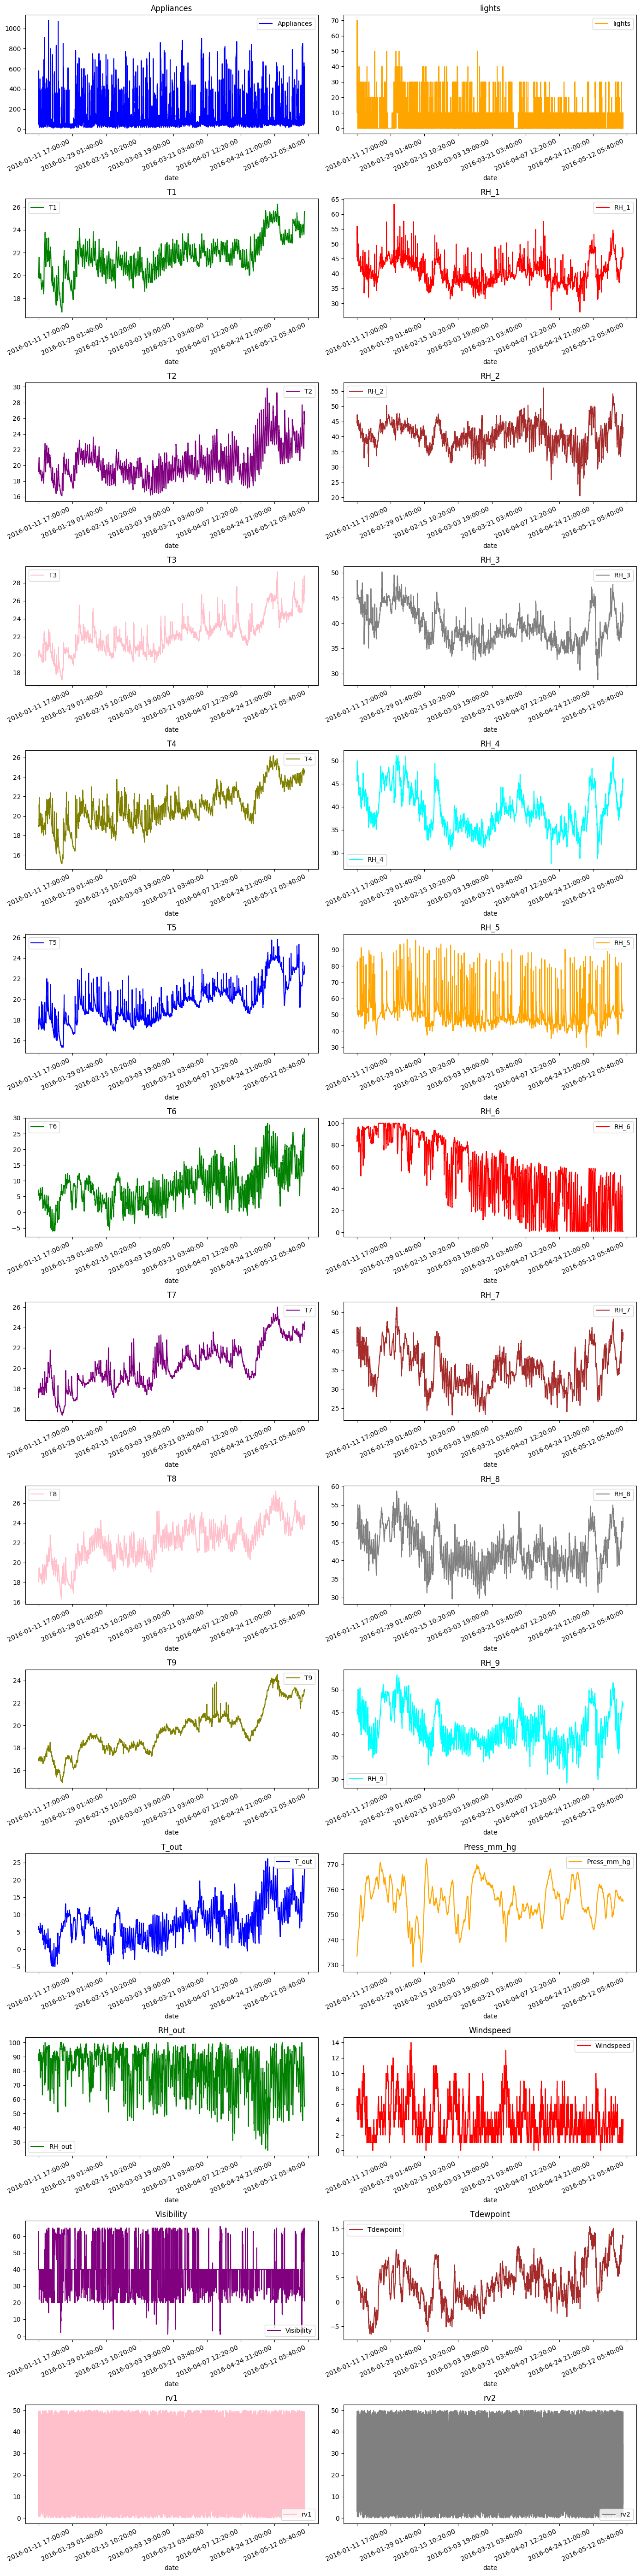

In [5]:

Visualization(df)

## Prepare data

In [6]:
df_input = df[['date','Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint','Visibility']]

df_input = df_input.set_index('date')
df_input.index = pd.to_datetime(df_input.index)
df_input.head()

,Appliances,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,
2016-01-11 17:00:00,60,6.600000,733.5,92.0,7.000000,5.3,63.000000
2016-01-11 17:10:00,60,6.483333,733.6,92.0,6.666667,5.2,59.166667
2016-01-11 17:20:00,50,6.366667,733.7,92.0,6.333333,5.1,55.333333
2016-01-11 17:30:00,50,6.250000,733.8,92.0,6.000000,5.0,51.500000
2016-01-11 17:40:00,60,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [8]:
df_input.index[0], df_input.index[-1]

('2016-01-11 17:00:00', '2016-05-27 18:00:00')

In [13]:
df_input.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [14]:
train_time = "2016-05-10 00:00:00"
prediction_length = 144

In [16]:
df_input['Appliances'][:train_time]

date
2016-01-11 17:00:00    60
2016-01-11 17:10:00    60
2016-01-11 17:20:00    50
2016-01-11 17:30:00    50
2016-01-11 17:40:00    60
                       ..
2016-05-09 23:20:00    60
2016-05-09 23:30:00    60
2016-05-09 23:40:00    50
2016-05-09 23:50:00    70
2016-05-10 00:00:00    50
Name: Appliances, Length: 17179, dtype: int64

In [17]:
from gluonts.dataset.common import ListDataset

training_data = ListDataset(
    [{"start":df_input.index[0], "target": df_input['Appliances'][:train_time]}],
    freq = "10min"
)

# Training and Prediction

In [15]:
estimator = DeepAREstimator(freq="10min",
                            context_length=720,
                            prediction_length=prediction_length,
                            num_layers=2,
                            num_cells=128,
                            cell_type='lstm',
                            trainer=Trainer(epochs=8))

In [18]:
predictor = estimator.train(training_data=training_data)

100%|██████████| 50/50 [00:58<00:00,  1.17s/it, epoch=8/8, avg_epoch_loss=4.39]


In [19]:
test_data = ListDataset(
    [
     {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-11 00:00:00"]},
     {"start": df_input.index[0], "target": df_input.Appliances[:"2016-05-15 00:00:00"]}
    ],
    freq = "10min"
)

In [20]:
from gluonts.evaluation.backtest import  make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset = test_data,
    predictor = predictor,
    num_samples = 100
)

In [21]:
forecast = list(forecast_it)
tss = list(ts_it)

In [22]:
forecast_entry = forecast[0]

In [23]:
def plot_prob_forecast(ts_entry, forecast_entry):
  plot_length = prediction_length
  prediction_intervals = (80.0, 95.0)
  legend = ["observations","median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

  fig, ax = plt.subplots(1,1,figsize=(10,7))
  ts_entry[-plot_length:].plot(ax=ax)
  forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
  plt.grid(which="both")
  plt.legend(legend, loc="upper left")
  plt.show()

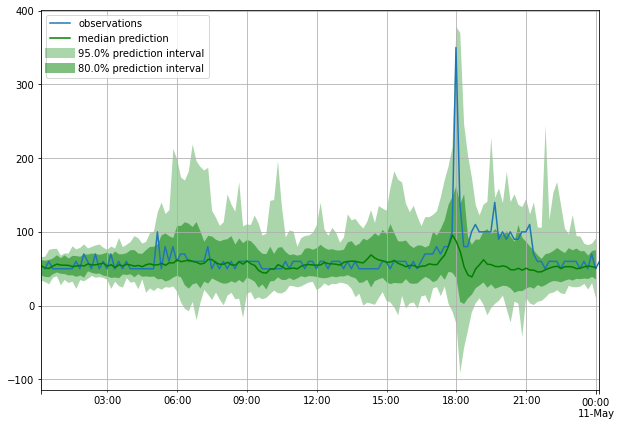

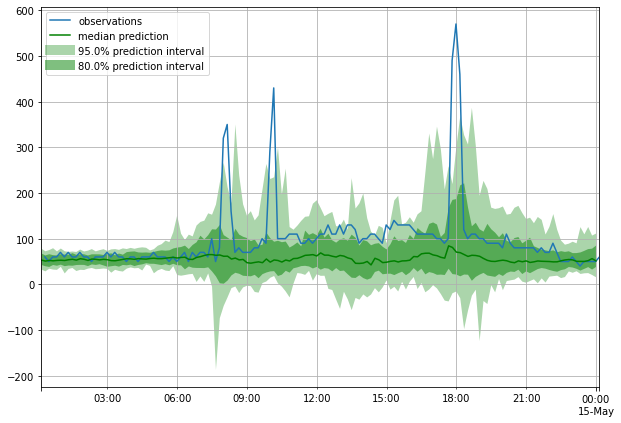

In [24]:
plot_prob_forecast(tss[0], forecast[0])
plot_prob_forecast(tss[1], forecast[1])

In [25]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1,0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecast), num_series = len(test_data))

Running evaluation: 100%|██████████| 2/2 [00:00<00:00, 13.57it/s]


In [26]:
agg_metrics

{'Coverage[0.1]': 0.0,
 'Coverage[0.5]': 0.24305555555555558,
 'Coverage[0.9]': 0.7916666666666667,
 'MAE_Coverage': 0.15509259259259256,
 'MAPE': 0.24857275353537667,
 'MASE': 0.4604949010133881,
 'MSE': 3873.6134440104165,
 'MSIS': 4.9090120533872295,
 'ND': 0.35810973558321985,
 'NRMSE': 0.7512425672020443,
 'OWA': nan,
 'QuantileLoss[0.1]': 2929.3559791564944,
 'QuantileLoss[0.5]': 8544.49861907959,
 'QuantileLoss[0.9]': 6460.0317832946785,
 'RMSE': 62.23835990778048,
 'abs_error': 8544.498291015625,
 'abs_target_mean': 82.84722222222223,
 'abs_target_sum': 23860.0,
 'mean_absolute_QuantileLoss': 5977.962127176921,
 'mean_wQuantileLoss': 0.250543257635244,
 'sMAPE': 0.3141401476330227,
 'seasonal_error': 64.61070327589803,
 'wQuantileLoss[0.1]': 0.12277267305769046,
 'wQuantileLoss[0.5]': 0.35810974933275735,
 'wQuantileLoss[0.9]': 0.2707473505152841}

In [27]:

item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,767.851888,2058.410400,9510.0,66.041667,64.962137,0.220044,0.168443,0.194960,0.216447,2.316284,930.610834,0.0,2058.41050,0.368056,1267.347613,0.909722
1,NaN,6979.375000,6486.087891,14350.0,99.652778,64.259270,0.700946,0.328703,0.433321,0.451992,7.501740,1998.745145,0.0,6486.08812,0.118056,5192.684171,0.673611


In [28]:
import json
csv_file = "pred.json"
with open(csv_file, 'w') as writer:
    writer.write(json.dumps(agg_metrics, indent=4))

## Change training

In [32]:
import mxnet as mx
from gluonts.mx.trainer.learning_rate_scheduler import LearningRateReduction
from gluonts.mx.trainer import Trainer
from gluonts.mx.trainer.model_averaging import ModelAveraging, SelectNBestSoftmax, SelectNBestMean
from gluonts.mx.distribution import ZeroInflatedNegativeBinomialOutput, StudentTOutput #likelihood
import os
from gluonts.evaluation import Evaluator
from gluonts.model.predictor import Predictor
import shutil
from pathlib import Path

#SERVE the parameters
model_path = "./pred_{}/".format(prediction_length)

RUN_MODEL = True
if RUN_MODEL:
    callbacks = [
        LearningRateReduction(objective="min",
                            patience=10,
                            base_lr=5e-3,
                            decay_factor=0.5,
                            ),
        ModelAveraging(avg_strategy=SelectNBestMean(num_models=2))
    ]

    estimator = DeepAREstimator(freq="10min",
                            context_length=720,
                            prediction_length=prediction_length,
                    
                            num_layers=4,
                            num_cells=128,
                            cell_type='lstm',
                            dropout_rate=0.01,
                            distr_output=ZeroInflatedNegativeBinomialOutput(),#可能是这个的原因
                            trainer=Trainer(ctx=mx.context.gpu(),
                                            epochs=8,
                                            callbacks=callbacks))

    predictor = estimator.train(training_data)
    if os.path.exists(model_path):
        shutil.rmtree(model_path)
    os.mkdir( model_path)
    predictor.serialize(Path(model_path))
else:
    predictor = Predictor.deserialize(Path(model_path))

100%|██████████| 50/50 [01:34<00:00,  1.90s/it, epoch=8/8, avg_epoch_loss=4.34]


In [43]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

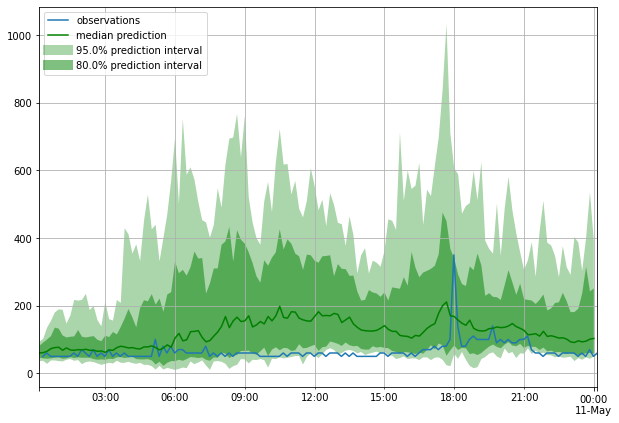

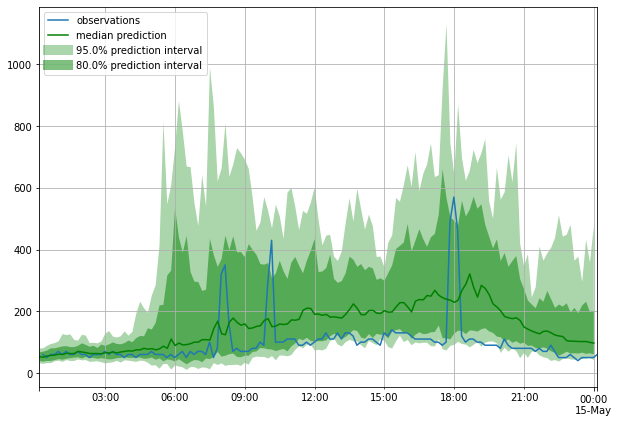

In [45]:
plot_prob_forecast(tss[0], forecasts[0])
plot_prob_forecast(tss[1], forecasts[1])

In [47]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1,0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series = len(test_data))

Running evaluation: 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]


In [48]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,ND,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,8842.848958,8352.0,9510.0,66.041667,64.962137,0.892828,0.966058,0.588861,0.878233,6.900066,2047.6,0.430556,8352.0,0.951389,5515.4,1.000000
1,NaN,13163.520833,10662.0,14350.0,99.652778,64.259270,1.152233,0.757265,0.518724,0.742997,6.819487,2915.0,0.437500,10662.0,0.888889,6163.4,0.986111
